### Giriş 


Bu derin öğrenme modeli, ses sinyallerinden özellik çıkarmak için **Mel Frekansı Kepstral Katsayıları (MFCC)** yöntemini kullanır. İşte bu sürecin adımları ve arka plandaki matematiksel işlemler:

1. **Ses Sinyalinin Yüklenmesi**: `librosa.load` fonksiyonu ile ses dosyası yüklenir ve ses sinyali (`librosa_audio_data`) ile örnekleme hızı (`librosa_sample_rate`) elde edilir.

2. **Ses Sinyalinin Görselleştirilmesi**: `matplotlib.pyplot` kütüphanesi kullanılarak ses sinyalinin zaman domenindeki dalga formu görselleştirilir.

3. **MFCC Özellik Çıkarımı**: `librosa.feature.mfcc` fonksiyonu ile ses sinyalinden MFCC özellikleri çıkarılır. `n_mfcc` parametresi, döndürülecek MFCC sayısını belirtir.

4. **Özelliklerin Ölçeklendirilmesi**: MFCC matrisinin transpozu alınır ve her sütunun ortalaması hesaplanarak özellikler ölçeklendirilir.

5. **Özelliklerin Veri Çerçevesine Dönüştürülmesi**: Çıkarılan özellikler ve etiketler bir veri çerçevesine dönüştürülür.

6. **Eğitim ve Test Verilerinin Ayrılması**: `train_test_split` fonksiyonu ile veri seti eğitim ve test verileri olarak ayrılır.

7. **Modelin Oluşturulması ve Eğitimi**:
   - **Model Yapısı**: `Sequential` modeli kullanılarak, gizli katmanlar ve çıktı katmanı eklenir. Her katmanda `Dense` (yoğun) katmanlar, `Activation` (aktivasyon fonksiyonları) ve `Dropout` (aşırı uyumu önlemek için) kullanılır.
   - **Model Derlemesi**: `compile` fonksiyonu ile model kayıp fonksiyonu (`loss`), metrikler (`metrics`) ve optimizasyon algoritması (`optimizer`) belirlenir.
   - **Model Eğitimi**: `fit` fonksiyonu ile model, eğitim verileri üzerinde belirli sayıda dönem (`epochs`) ve belirli bir parti boyutu (`batch_size`) ile eğitilir.
   - **Model Değerlendirmesi**: `evaluate` fonksiyonu ile modelin test verileri üzerindeki performansı değerlendirilir.

8. **Tahmin Yapma**: `predict_classes` fonksiyonu ile test verileri için sınıf tahminleri yapılır.

Bu süreçte kullanılan matematiksel işlemler arasında Fourier Dönüşümü, Mel Ölçeği dönüşümü, logaritmik dönüşüm ve Diskret Kosinüs Dönüşümü (DCT) bulunur. Bu işlemler, ses sinyalinin frekans bileşenlerini analiz eder ve insan kulağının frekans algısına benzer bir şekilde özellikler çıkarır.

Modelin detaylarına gelince, bu model ses sinyallerini sınıflandırmak için derin bir sinir ağı kullanır. Model, ses sinyallerinin MFCC özelliklerini alır ve bu özellikleri kullanarak sesin hangi kategoriye ait olduğunu tahmin eder. Modelin yapısı, katman sayısı, nöron sayısı, aktivasyon fonksiyonları ve diğer hiperparametreler, modelin performansını ve genelleme yeteneğini etkileyen önemli faktörlerdir. Eğitim sürecinde, modelin ağırlıkları geri yayılım algoritması kullanılarak güncellenir ve modelin doğruluğu arttırılır. Eğitim sonunda, modelin test verileri üzerindeki doğruluğu, modelin ne kadar iyi öğrendiğinin bir göstergesidir.


## DERİN ÖĞRENME KULLANARAK SES SİNYALİ SINIFLANDIRMA

Bu proje 3 ana adımdan oluşmaktadır:

1. Adım: Veri setimizi analiz için hazırlayacağız ve Mel-Frekansı Kepstral Katsayıları (MFCC) kullanarak ses dosyalarından ses sinyali özellikleri çıkaracağız.

2. Daha sonra bir Evrişimli Sinir Ağları (CNN) modeli oluşturacağız ve modelimizi veri setimizle eğiteceğiz.

3. Son olarak, modelimizi kullanarak bir ses dosyasının sınıfını tahmin edeceğiz.

UrbanSound8K Veri Setini kullanacağız, indirme bağlantısı burada: https://urbansounddataset.weebly.com/download-urbansound8k.hight="250">
    

        

### Adım 1: Veri setimizi analiz için hazırlayacağız ve ses sinyali özelliklerini ses dosyalarından Mel-Frekans Kepstral Katsayıları (MFCC) kullanarak çıkaracağız.

Mel Frekansı Kepstral Katsayıları (MFCC), ses işleme ve özellikle konuşma tanıma alanında yaygın olarak kullanılan bir özellik çıkarma tekniğidir. MFCC, ses sinyallerinin kısa vadeli güç spektrumunun bir temsilidir ve insan kulağının frekans algısını taklit eden bir ölçek üzerinde çalışır. İşte MFCC’nin temel adımları ve özellikleri:

Sinyal Örnekleme: Ses sinyali, belirli bir örnekleme frekansında örneklenir.
Hamming Penceresi: Sinyal, kısa sürelerle ve her bir örneği birbirinden ayrılmış şekilde işlenir.
**FFT (Hızlı Fourier Dönüşümü)**: Hamming penceresi boyunca sinyal işlendikten sonra FFT uygulanır ve sinyal frekans bileşenlerine ayrılır.
Mel Filtre Bankası: Frekans bileşenleri, Mel ölçeğinde ölçeklendirilir. Bu ölçek, insan kulağının frekans duyarlılığına benzer.
**Logaritmik Dönüşüm**: Mel filtre bankası çıktısı üzerinde logaritmik dönüşüm uygulanır.
**Kepstral Katsayıları**: Logaritmik dönüşüm sonrası elde edilen değerler, Kepstral katsayıları olarak adlandırılır ve sesin karakteristik özelliklerini temsil eder.
MFCC özellikleri, konuşma tanıma, konuşma sentezi ve müzik sınıflandırma gibi uygulamalarda kullanılır. Python’da, librosa kütüphanesi MFCC özelliklerini çıkarmak için sıklıkla kullanılır. Bu kütüphane, ses dosyalarından MFCC özelliklerini çıkarmak ve bunları görselleştirmek için kullanışlı fonksiyonlar sağlar

Detaylı bilgi için, ses işleme alanında MFCC ve GMM (Gaussian Mixture Model) tekniklerine dair açıklamalar yapan ve Python dilinde örnek kodlar veren bir makaleye göz atabilirsiniz. Ayrıca, MFCC’nin önemini ve ses tanıma uygulamalarındaki yerini anlatan başka bir makale de mevcuttur.. mevcutturğız.

### Fourier Dönüşümü (FT):
 Ses sinyalinin zaman domeninden frekans domenine dönüştürülmesi için kullanılır. Bu, sinyalin frekans bileşenlerini analiz etmek için temel bir adımdır.

$$ X(k) = \sum_{n=0}^{N-1} x(n) \cdot e^{-\frac{i2\pi}{N}kn} $$

### Mel Ölçeği:
İnsan kulağının frekans algısını taklit eden bir ölçektir. Gerçek frekansları Mel ölçeğine dönüştürerek, insan kulağının duyarlı olduğu frekans aralıklarına daha fazla ağırlık verilir.

$$ M(f) = 2595 \cdot \log_{10}\left(1 + \frac{f}{700}\right) $$


### Mel Filtre Bankası:
Frekans spektrumunu Mel ölçeğine göre bantlara ayırır. Bu üçgen filtreler, ses sinyalinin belirli frekans aralıklarındaki enerjisini toplar.

$$
H_m(k) = \begin{cases} 
0, & \text{for } k < f(m-1) \\
\frac{k - f(m-1)}{f(m) - f(m-1)}, & \text{for } f(m-1) \leq k \leq f(m) \\
\frac{f(m+1) - k}{f(m+1) - f(m)}, & \text{for } f(m) \leq k \leq f(m+1) \\
0, & \text{for } k > f(m+1)
\end{cases}
$$


### Logaritmik Dönüşüm:
Mel spektrumunun logaritmasını alarak, sinyalin spektral bileşenlerinin dinamik aralığını sıkıştırır. Bu, sinyalin daha kararlı bir temsilini sağlar.

$$ \log S(m) $$


### Diskret Kosinüs Dönüşümü (DCT):
 Logaritmik Mel spektrumunu kepstral katsayılara dönüştürür. Bu adım, sinyalin özelliklerini daha az korelasyonlu ve daha kompakt bir formda ifade eder.

$$ C(n) = \sum_{m=0}^{M-1} \log S(m) \cdot \cos\left[n(m - \frac{1}{2})\frac{\pi}{M}\right] $$


In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

In [3]:
audio_file_path='\DeepLearningAudioProcessing\RespiratorySoundDatabase\Respiratory_Sound_Database\Respiratory_Sound_Database/101_1b1_Al_sc_Meditron.wav'

librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data)

[ 3.4924597e-10  3.4924597e-10  4.6566129e-10 ... -7.9498515e-03
 -7.7366987e-03 -8.0531817e-03]


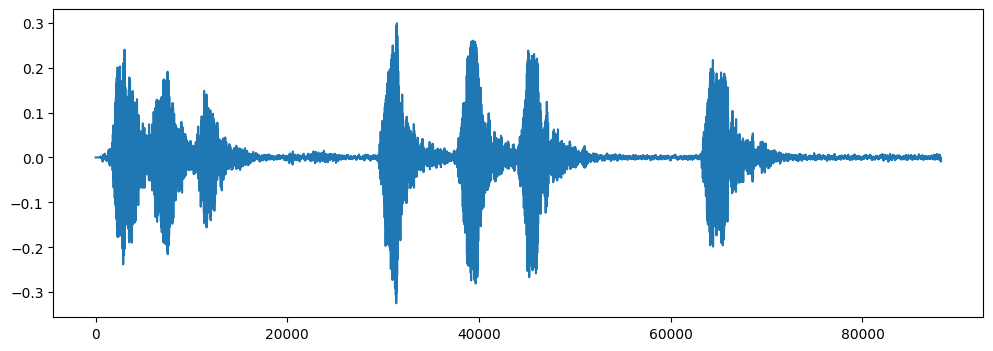

In [5]:
# Matplotlib kütüphanesinin 'figure' fonksiyonu ile bir grafik çerçevesi oluşturuyoruz.
# 'figsize' parametresi ile grafiğin boyutunu belirliyoruz (genişlik, yükseklik).
plt.figure(figsize=(12, 4))

# 'plot' fonksiyonu ile 'librosa_audio_data' içindeki ses verilerini çizgi grafiği olarak çiziyoruz.
plt.plot(librosa_audio_data)

# 'show' fonksiyonu ile grafiği gösteriyoruz.
plt.show()


In [6]:
# Lets read with scipy
# 'scipy.io' modülünden 'wavfile' fonksiyonunu 'wav' olarak içe aktarıyoruz.
from scipy.io import wavfile as wav

# 'wav.read' fonksiyonunu kullanarak ses dosyasını okuyoruz.
# 'audio_file_path' değişkeni, okunacak ses dosyasının yolunu belirtir.
# Bu fonksiyon, ses dosyasının örnekleme oranını ('wave_sample_rate') ve ses verilerini ('wave_audio') döndürür.
wave_sample_rate, wave_audio = wav.read(audio_file_path)


In [7]:
# 'wave_audio' değişkeni, okunan ses dosyasının ses verilerini içerir.
# Bu veriler, ses dalgalarının amplitüd değerlerini temsil eder ve ses işleme veya analizi için kullanılabilir.
wave_audio


array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], dtype=int16)

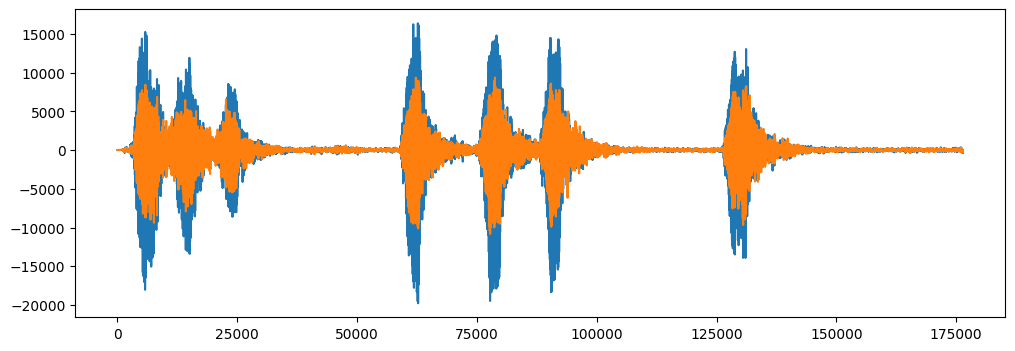

In [8]:
# 'plt.figure' fonksiyonu ile bir grafik çerçevesi oluşturuyoruz ve 'figsize' parametresi ile grafiğin boyutunu ayarlıyoruz.
plt.figure(figsize=(12, 4))

# 'plt.plot' fonksiyonu ile 'wave_audio' içindeki ses verilerini çizgi grafiği olarak çiziyoruz.
# 'wave_audio' iki kanallı bir ses dosyasından gelen verileri içerir, bu yüzden grafiğin iki ayrı çizgisi olacak.
plt.plot(wave_audio)

# 'plt.show' fonksiyonu ile oluşturduğumuz grafiği gösteriyoruz.
plt.show()


### Özellik Çıkarma
Burada, ses örneklerinden Mel-Frekans Kepstral Katsayıları (MFCC) kullanacağız. MFCC, pencere boyutu boyunca frekans dağılımını özetler, böylece sesin hem frekans hem de zaman özelliklerini analiz etmek mümkündür. Bu ses temsilleri, sınıflandırma için özellikleri belirlememize olanak tanıyacaktır.

In [9]:
# 'librosa.feature.mfcc' fonksiyonu ile Mel Frekansı Kepstral Katsayıları (MFCC) hesaplıyoruz.
# 'y' parametresi olarak ses verilerini, 'sr' parametresi olarak örnekleme oranını ve 'n_mfcc' parametresi olarak döndürülecek MFCC sayısını belirtiyoruz.
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)

# Hesaplanan MFCC'lerin şeklini (boyutlarını) yazdırıyoruz.
# Bu, MFCC matrisinin kaç örnek (satır) ve özellik (sütun) içerdiğini gösterir.
print(mfccs.shape)


(40, 173)


In [10]:
mfccs

array([[-5.7041687e+02, -5.0580988e+02, -4.4661017e+02, ...,
        -4.8128598e+02, -4.7245932e+02, -4.6425366e+02],
       [ 3.2360130e+01,  9.3758621e+01,  1.4270895e+02, ...,
         1.0403226e+02,  1.1474982e+02,  1.1683809e+02],
       [ 2.6088989e+01,  3.4996727e+01,  4.0650406e+01, ...,
         1.1899885e+01,  1.7138729e+01,  1.3889361e+01],
       ...,
       [ 5.9291601e-01,  2.7261462e+00, -2.6107330e+00, ...,
        -2.7341046e+00, -3.7576494e+00, -5.8963108e+00],
       [-1.3069378e+00, -2.1206622e+00, -9.1924393e-01, ...,
        -1.2278577e+00, -3.3734822e+00, -4.1975555e+00],
       [-2.0638499e+00, -2.9027801e+00,  2.7278209e-01, ...,
        -1.3872120e+00, -3.3259065e+00, -8.4930527e-01]], dtype=float32)

In [11]:
# Ses veri setinin yolunu tanımlıyoruz.
audio_dataset_path='UrbanSound8K/audio/'

# UrbanSound8K veri setinin metaverilerini içeren CSV dosyasını okuyoruz.
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

# Metaverilerin başını (ilk beş satırını) yazdırıyoruz.
metadata.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def features_extractor(filename):
    # Librosa ile ses dosyasını yükleyin ve örnekleme hızını alın.
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    
    # Ses sinyalinin uzunluğunu kontrol edin ve n_fft parametresini buna göre ayarlayın.
    # n_fft, kısa zamanlı Fourier dönüşümü penceresinin boyutudur.
    n_fft_value = min(2048, len(audio))
    
    # MFCC özelliklerini hesaplayın. n_mfcc parametresi, döndürülecek MFCC sayısını belirtir.
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40, n_fft=n_fft_value)
    
    # MFCC özelliklerinin zaman ekseninde ortalamasını alın ve ölçeklendirin.
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    # Ölçeklendirilmiş özellikleri döndürün.
    return mfccs_scaled_features



In [14]:
# Boş bir liste oluşturarak başlayın. Bu liste, çıkarılan özellikleri ve sınıf etiketlerini saklayacak.
extracted_features=[]

# 'metadata' DataFrame'indeki her satır için bir döngü başlatın.
# 'tqdm' fonksiyonu, işlemin ilerlemesini görsel bir çubukla gösterir.
for index_num, row in tqdm(metadata.iterrows()):
    # Ses dosyasının tam yolunu oluşturun.
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    # Her ses dosyasının sınıf etiketini alın.
    final_class_labels=row["class"]
    
    # 'features_extractor' fonksiyonunu kullanarak ses dosyasından özellikleri çıkarın.
    data=features_extractor(file_name)
    
    # Çıkarılan özellikleri ve sınıf etiketlerini 'extracted_features' listesine ekleyin.
    extracted_features.append([data,final_class_labels])


8732it [05:20, 27.24it/s]


In [63]:
# 'extracted_features' listesini bir Pandas DataFrame'ine dönüştürün.
# Bu DataFrame, her ses dosyasının özelliklerini ve sınıf etiketlerini içerecek.
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

# Oluşturulan DataFrame'in ilk beş satırını görüntüleyin.
# Bu, verilerin doğru bir şekilde yüklendiğini ve istenen formatta olduğunu kontrol etmek için kullanışlıdır.
extracted_features_df.head()


,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [64]:
# Veri setini bağımsız ve bağımlı veri setlerine ayırıyoruz.
# 'feature' sütunundaki özellikleri numpy dizisine dönüştürerek bağımsız değişkenlerimizi (X) oluşturuyoruz.
X = np.array(extracted_features_df['feature'].tolist())

# 'class' sütunundaki sınıf etiketlerini numpy dizisine dönüştürerek bağımlı değişkenlerimizi (y) oluşturuyoruz.
y = np.array(extracted_features_df['class'].tolist())


In [65]:
# 'X' numpy dizisinin şeklini (boyutlarını) sorgulayarak, 
# özellikler matrisinin kaç örnek (satır) ve özellik (sütun) içerdiğini kontrol ediyoruz.
X.shape


(8732, 40)

In [66]:
# 'X' dizisini yazdırarak, çıkarılan özelliklerin her bir örneğini gözlemleyebiliriz.
# Bu, veri setimizin nasıl göründüğünü ve her bir özelliğin değerlerini kontrol etmek için kullanılır.
X


array([[-2.1735526e+02,  7.0223389e+01, -1.3038527e+02, ...,
        -1.6930532e+00, -6.1698347e-01,  3.8600525e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489304e-01, -5.4468733e-01,  4.4632089e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962965e+00, -9.6140963e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941566e+01, ...,
        -3.0292377e+00,  2.7170296e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
        -7.9082427e+00, -1.6414586e+00,  5.6668439e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386460e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [67]:
# 'y' dizisini yazdırarak, her bir ses dosyasının karşılık geldiği sınıf etiketlerini gözlemleyebiliriz.
# Bu, modelimizin tahmin etmeye çalıştığı sınıfların ne olduğunu kontrol etmek için kullanılır.
y


array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [68]:
y.shape

(8732,)

In [69]:
# Etiket Kodlama (Label Encoding) yapılıyor çünkü modelimizde çıktı sınıfları için tek sıcak kodlanmış değerlere (1'ler ve 0'lar) ihtiyacımız var.

# Tek sıcak kodlama (One-hot encoding) şu şekilde hatırlanmalıdır:
# 1 0 0 0 0 0 0 0 0 0 => klima (air_conditioner)
# 0 1 0 0 0 0 0 0 0 0 => araba kornası (car_horn)
# 0 0 1 0 0 0 0 0 0 0 => çocukların oyunu (children_playing)
# 0 0 0 1 0 0 0 0 0 0 => köpek havlaması (dog_bark)
# ...
# 0 0 0 0 0 0 0 0 0 1 => sokak müziği (street_music)

# LabelEncoder nesnesini başlat
labelencoder=LabelEncoder()

# 'y' etiketlerini sayısal formata dönüştür ve one-hot encoding uygula
y=to_categorical(labelencoder.fit_transform(y))


In [70]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
X_train

array([[-1.3110471e+02,  1.1250591e+02, -2.2574694e+01, ...,
         3.2466519e+00, -1.3690238e+00,  2.7557547e+00],
       [-1.3670342e+01,  9.1085083e+01, -7.7927332e+00, ...,
        -3.2530508e+00, -5.2774525e+00, -1.5569715e+00],
       [-4.9871544e+01,  2.6535299e-01, -2.0500937e+01, ...,
         2.8545945e+00, -1.6092044e+00,  3.5248058e+00],
       ...,
       [-4.2701236e+02,  9.2623047e+01,  3.1293974e+00, ...,
         7.4264121e-01,  7.3349077e-01,  7.1100914e-01],
       [-1.4575461e+02,  1.3626578e+02, -3.3515522e+01, ...,
         1.4681195e+00, -2.0091701e+00, -8.8218188e-01],
       [-4.2103134e+02,  2.1065454e+02,  3.4906607e+00, ...,
        -5.3888674e+00, -3.3713605e+00, -1.5665114e+00]], dtype=float32)

In [26]:
# 'y' dizisinin şeklini (boyutlarını) sorgulayarak, 
# sınıf etiketlerinin kaç örnek (satır) içerdiğini kontrol ediyoruz.
y.shape


(8732, 10)

In [27]:
# 'X_train' eğitim veri setinin şeklini (boyutlarını) sorgulayarak,
# eğitim için kullanılacak özellikler matrisinin kaç örnek (satır) ve özellik (sütun) içerdiğini kontrol ediyoruz.
X_train.shape


(6985, 40)

In [28]:
# 'X_test' test veri setinin şeklini (boyutlarını) sorgulayarak,
# test için kullanılacak özellikler matrisinin kaç örnek (satır) ve özellik (sütun) içerdiğini kontrol ediyoruz.
X_test.shape


(1747, 40)

In [29]:
# 'y_train' eğitim veri setindeki sınıf etiketlerinin şeklini (boyutlarını) sorgulayarak,
# eğitim için kullanılacak sınıf etiketlerinin kaç örnek (satır) içerdiğini kontrol ediyoruz.
y_train.shape


(6985, 10)

In [30]:
# 'y_test' test veri setindeki sınıf etiketlerinin şeklini (boyutlarını) sorgulayarak,
# test için kullanılacak sınıf etiketlerinin kaç örnek (satır) içerdiğini kontrol ediyoruz.
y_test.shape


(1747, 10)

### Adım 2: Evrişimli Sinir Ağları (CNN) Modeli Oluşturma ve UrbanSound8K Veri Seti ile Modelimizi Eğitme.


In [33]:
# Kaç sınıfımız var? Modelimizde bunu kullanmalıyız.
num_labels = 10

In [34]:
# CNN modelimizin inşasına başlıyoruz.

# Sequential modeli başlatılıyor.
model=Sequential()

# 1. gizli katman (hidden layer)
model.add(Dense(125,input_shape=(40,))) # 40 özellik girişi ile 125 nöronlu yoğun katman ekleniyor.
model.add(Activation('relu')) # ReLU aktivasyon fonksiyonu ekleniyor.
model.add(Dropout(0.5)) # Aşırı uyumu önlemek için %50 oranında dropout uygulanıyor.

# 2. gizli katman
model.add(Dense(250)) # 250 nöronlu yoğun katman ekleniyor.
model.add(Activation('relu')) # ReLU aktivasyon fonksiyonu ekleniyor.
model.add(Dropout(0.5)) # Aşırı uyumu önlemek için %50 oranında dropout uygulanıyor.

# 3. gizli katman
model.add(Dense(125)) # 125 nöronlu yoğun katman ekleniyor.
model.add(Activation('relu')) # ReLU aktivasyon fonksiyonu ekleniyor.
model.add(Dropout(0.5)) # Aşırı uyumu önlemek için %50 oranında dropout uygulanıyor.

# Çıktı katmanı
model.add(Dense(num_labels)) # 'num_labels' sayıda nöron içeren yoğun katman ekleniyor (sınıf sayısı kadar).
model.add(Activation('softmax')) # Softmax aktivasyon fonksiyonu ile olasılık dağılımı elde ediliyor.




In [35]:
# Model özeti yazdırılıyor.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 125)                 │           5,125 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 250)                 │          31,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 125)                 │          31,375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,260 (270.55 KB)

 Trainable params: 69,260 (270.55 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [37]:
# Modeli Eğitme

epochscount = 300
num_batch_size = 32

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=epochscount, validation_data=(X_test, y_test), verbose=1)


Epoch 1/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1292 - loss: 20.0481 - val_accuracy: 0.1500 - val_loss: 2.2590
Epoch 2/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1450 - loss: 2.6464 - val_accuracy: 0.1402 - val_loss: 2.2100
Epoch 3/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1591 - loss: 2.3153 - val_accuracy: 0.2106 - val_loss: 2.1462
Epoch 4/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1863 - loss: 2.1995 - val_accuracy: 0.2192 - val_loss: 2.0939
Epoch 5/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1949 - loss: 2.1552 - val_accuracy: 0.2582 - val_loss: 2.0098
Epoch 6/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 2.0907 - val_accuracy: 0.3188 - val_loss: 1.8587
Epoch 7/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2484 - loss: 2.0303 - val_accuracy: 0.3205 - val_loss: 1.8187
Epoch 8/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2665 - loss: 1.9848 - val_acc

In [55]:
# Modelin doğrulama/test seti üzerindeki performansını değerlendir
validation_test_set_accuracy = model.evaluate(X_test, y_test, verbose=0)
# Doğrulama/test seti doğruluğunu yazdır
print(validation_test_set_accuracy[1])


0.8362907767295837


In [56]:
# X_test veri setinin ikinci örneğini al
X_test[1]


array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.339348  ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.673634  ,  -29.164494  ,  -18.950253  ,
         -2.9579997 ,   -8.162329  ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.6302314 ,
         -1.0564744 ,    3.215267  ,   -6.9842815 ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346086,  -23.843391  ,
        -15.267322  ,    9.245734  ,   10.367628  ,   -0.5832011 ,
         -1.2624054 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [57]:
# Modeli kullanarak X_test veri seti üzerinde tahminlerde bulun
predictions = model.predict(X_test)
# Tahminler arasından en yüksek olasılığa sahip sınıfı seç
predicted_classes = np.argmax(predictions, axis=1)



55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step


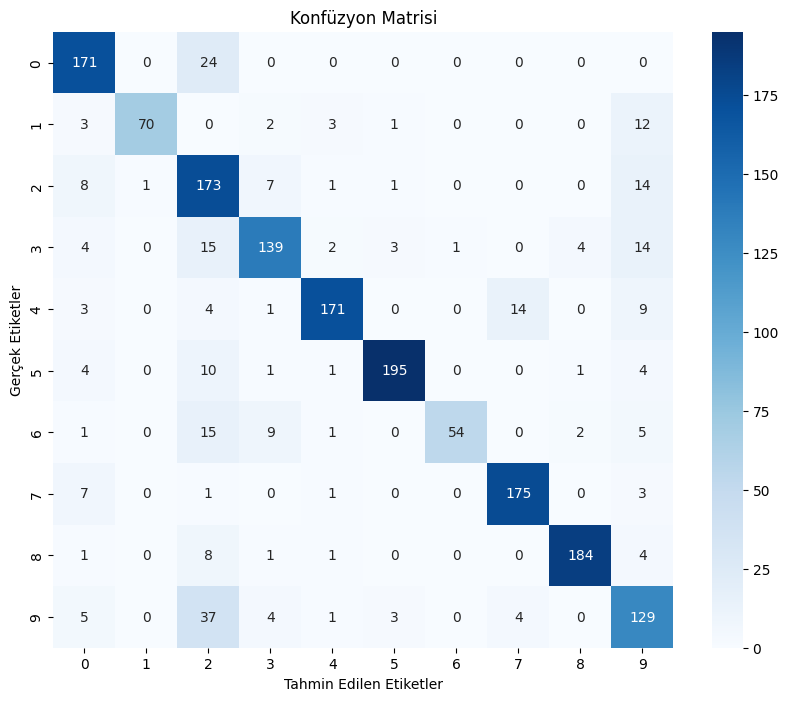

In [41]:
# Konfüzyon matrisi kodunu buraya yapıştırın ve çalıştırın
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Modelin tahminlerini alın
y_pred = model.predict(X_test)
# Tahminleri en yüksek olasılığa sahip sınıfların indekslerine dönüştürün
y_pred_classes = np.argmax(y_pred, axis=1)
# Gerçek etiketleri de aynı formata dönüştürün
y_true = np.argmax(y_test, axis=1)

# Konfüzyon matrisini hesaplayın
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Konfüzyon matrisini görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Gerçek Etiketler')
plt.xlabel('Tahmin Edilen Etiketler')
plt.title('Konfüzyon Matrisi')
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Modelin tahminlerini alın
y_pred = model.predict(X_test)
# Tahminleri en yüksek olasılığa sahip sınıfların indekslerine dönüştürün
y_pred_classes = np.argmax(y_pred, axis=1)
# Gerçek etiketleri de aynı formata dönüştürün
y_true = np.argmax(y_test, axis=1)

# Konfüzyon matrisini hesaplayın
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# TP, FP, TN, FN değerlerini her sınıf için hesaplayın
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(TP) - TP

# TP, FP, TN, FN değerlerini yazdırın
print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
True Positives: [171  70 173 139 171 195  54 175 184 129]
False Positives: [ 36   1 114  25  11   8   1  18   7  65]
True Negatives: [1290 1391 1288 1322 1290 1266 1407 1286 1277 1332]
False Negatives: [24 21 32 43 31 21 33 12 15 54]


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini alın
y_pred = model.predict(X_test)
# Tahminleri en yüksek olasılığa sahip sınıfların indekslerine dönüştürün
y_pred_classes = np.argmax(y_pred, axis=1)
# Gerçek etiketleri de aynı formata dönüştürün
y_true = np.argmax(y_test, axis=1)

# Konfüzyon matrisini hesaplayın
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Performans metriklerini yazdırın
print(f"Genel Doğruluk (Accuracy): {accuracy:.2f}")
print(f"Hassasiyet (Precision): {precision:.2f}")
print(f"Duyarlılık (Recall/Sensitivity): {recall:.2f}")
print(f"F1 Skoru: {f1:.2f}")


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
Genel Doğruluk (Accuracy): 0.84
Hassasiyet (Precision): 0.87
Duyarlılık (Recall/Sensitivity): 0.82
F1 Skoru: 0.84


### Adım 3: Son olarak CNN Modelimizi Kullanarak Bir Ses Dosyasının Sınıfını Tahmin Ediyoruz.Önce yeni ses verilerini ön işleme tabi tutuyoruz ve sonra sınıfı tahmin ediyoruz..


In [44]:
# Dosya adı belirtiliyor
filename="UrbanSound8K/7383-3-0-0.wav"

# Librosa kullanılarak ses sinyali ve örnekleme hızı yükleniyor.
sound_signal, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

# MFCC özellikleri hesaplanıyor.
mfccs_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=40)

# MFCC özelliklerinin ortalaması alınıyor ve ölçeklendiriliyor.
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [45]:
# Ölçeklendirilmiş özellikler yazdırılıyor.
print(mfccs_scaled_features)

[-3.9742188e+02  1.4218434e+02  1.0239104e+01 -9.6230555e+00
 -8.1905842e+00  7.6672630e+00 -1.0299530e+01 -7.1226473e+00
 -3.5969069e+00 -5.6251783e+00 -2.4014688e+00 -3.5109861e+00
  5.2140422e+00  9.1520948e+00  9.7396631e+00  1.2672479e+01
  2.4935956e+00 -1.9596174e-01  2.0568907e+00  1.2565471e-01
  2.3887670e-01 -2.2244751e+00 -4.1830082e+00 -8.7841499e-01
  5.5512738e-01  1.4530714e+00  1.5828408e+00  2.5280828e+00
  4.4751973e+00  1.8469352e+00  8.8243961e-02 -2.5079804e-02
  1.9693791e+00  1.1326448e+00  1.8206310e-01 -9.0641969e-01
 -2.5448072e+00 -1.7134562e+00 -1.3600037e+00  3.9560735e-01]


In [46]:
# Özellikler yeniden şekillendiriliyor.
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

In [47]:
# Yeniden şekillendirilmiş özelliklerin boyutları yazdırılıyor.
mfccs_scaled_features.shape

(1, 40)

In [48]:
print(mfccs_scaled_features.shape)

(1, 40)


In [49]:
print(mfccs_scaled_features)

[[-3.9742188e+02  1.4218434e+02  1.0239104e+01 -9.6230555e+00
  -8.1905842e+00  7.6672630e+00 -1.0299530e+01 -7.1226473e+00
  -3.5969069e+00 -5.6251783e+00 -2.4014688e+00 -3.5109861e+00
   5.2140422e+00  9.1520948e+00  9.7396631e+00  1.2672479e+01
   2.4935956e+00 -1.9596174e-01  2.0568907e+00  1.2565471e-01
   2.3887670e-01 -2.2244751e+00 -4.1830082e+00 -8.7841499e-01
   5.5512738e-01  1.4530714e+00  1.5828408e+00  2.5280828e+00
   4.4751973e+00  1.8469352e+00  8.8243961e-02 -2.5079804e-02
   1.9693791e+00  1.1326448e+00  1.8206310e-01 -9.0641969e-01
  -2.5448072e+00 -1.7134562e+00 -1.3600037e+00  3.9560735e-01]]


In [50]:
# Model kullanılarak tahmin yapılıyor.
result_array = model.predict(mfccs_scaled_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [51]:
result_array


array([[6.4553966e-11, 6.5906085e-07, 4.1534286e-06, 9.8863667e-01,
        7.6079388e-08, 4.1190651e-09, 1.1336484e-02, 1.0254619e-15,
        1.0698557e-05, 1.1210197e-05]], dtype=float32)

In [71]:
# Olası sonuç sınıflarının listesi
result_classes = ["air_conditioner","car_horn","children_playing","dog_bark","drilling", 
                  "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

# result_array'in ilk elemanı için en yüksek olasılığa sahip sınıfın indeksini bul
result = np.argmax(result_array[0])
# Bulunan indeksi kullanarak sonucun sınıfını yazdır
print(result_classes[result])


dog_bark
